In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#plt.style.use("seaborn")
sns.set(font_scale = 1)
sns.set_style("whitegrid")

import plotly.express as px

import chart_studio.plotly as py
#import cufflink as cf
#cf.go_offiline(connected=True)

import plotly.graph_objects as go
import plotly.offline as pyo
#pyo.inti_notebook_mode()

from plotly.subplots import make_subplots

import missingno as msno

import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
path = "D:/에어비앤비/파리/listings.csv"

In [5]:
bnb = pd.read_csv(path)

print(bnb.shape)
bnb.head()

(84397, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99


In [6]:
columns_to_drop = ['scrape_id','last_scraped','source','name','neighborhood_overview','picture_url','host_url','host_name','host_since','host_location','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_verifications','neighbourhood','neighbourhood_group_cleansed','property_type','bathrooms_text','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_60','availability_90','availability_365','calendar_last_scraped','number_of_reviews_ltm','first_review','last_review','license','instant_bookable','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']
bnb.drop(columns=columns_to_drop, inplace=True)

In [7]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           84397 non-null  int64  
 1   listing_url                  84397 non-null  object 
 2   description                  80894 non-null  object 
 3   host_id                      84397 non-null  int64  
 4   host_response_time           48310 non-null  object 
 5   host_response_rate           48310 non-null  object 
 6   host_acceptance_rate         56521 non-null  object 
 7   host_is_superhost            84306 non-null  object 
 8   host_total_listings_count    84390 non-null  float64
 9   host_has_profile_pic         84390 non-null  object 
 10  host_identity_verified       84390 non-null  object 
 11  neighbourhood_cleansed       84397 non-null  object 
 12  latitude                     84397 non-null  float64
 13  longitude       

In [8]:
#범주형 데이터 통계치 확인
bnb.describe(include = np.object_)

,listing_url,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,amenities,price,has_availability
count,84397,80894,48310,48310,56521,84306,84390,84390,84397,84397,84397,60917,79888
unique,84397,77184,4,96,101,2,2,2,20,4,74770,1436,2
top,https://www.airbnb.com/rooms/3109,"Simplify your life in this peaceful, central s...",within an hour,100%,100%,f,t,t,Buttes-Montmartre,Entire home/apt,[],$150.00,t
freq,1,136,29746,37075,19575,70927,81681,75657,9327,74608,350,1699,79193


In [9]:
#범주형 데이터 종류 확인
print("neighbourhood_cleansed:", bnb["neighbourhood_cleansed"].unique())
print("room_type:", bnb["room_type"].unique())

neighbourhood_cleansed: ['Observatoire' 'Temple' 'Hôtel-de-Ville' 'Entrepôt' 'Bourse' 'Popincourt'
 'Louvre' 'Buttes-Montmartre' 'Buttes-Chaumont' 'Opéra'
 'Batignolles-Monceau' 'Passy' 'Élysée' 'Vaugirard' 'Ménilmontant'
 'Panthéon' 'Gobelins' 'Reuilly' 'Luxembourg' 'Palais-Bourbon']
room_type: ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


In [10]:
bnb.isnull().sum()

id                                 0
listing_url                        0
description                     3503
host_id                            0
host_response_time             36087
host_response_rate             36087
host_acceptance_rate           27876
host_is_superhost                 91
host_total_listings_count          7
host_has_profile_pic               7
host_identity_verified             7
neighbourhood_cleansed             0
latitude                           0
longitude                          0
room_type                          0
accommodates                       0
bathrooms                      23438
bedrooms                        6917
beds                           23569
amenities                          0
price                          23480
minimum_nights                     0
maximum_nights                     0
calendar_updated               84397
has_availability                4509
availability_30                    0
number_of_reviews                  0
n

<Axes: >

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

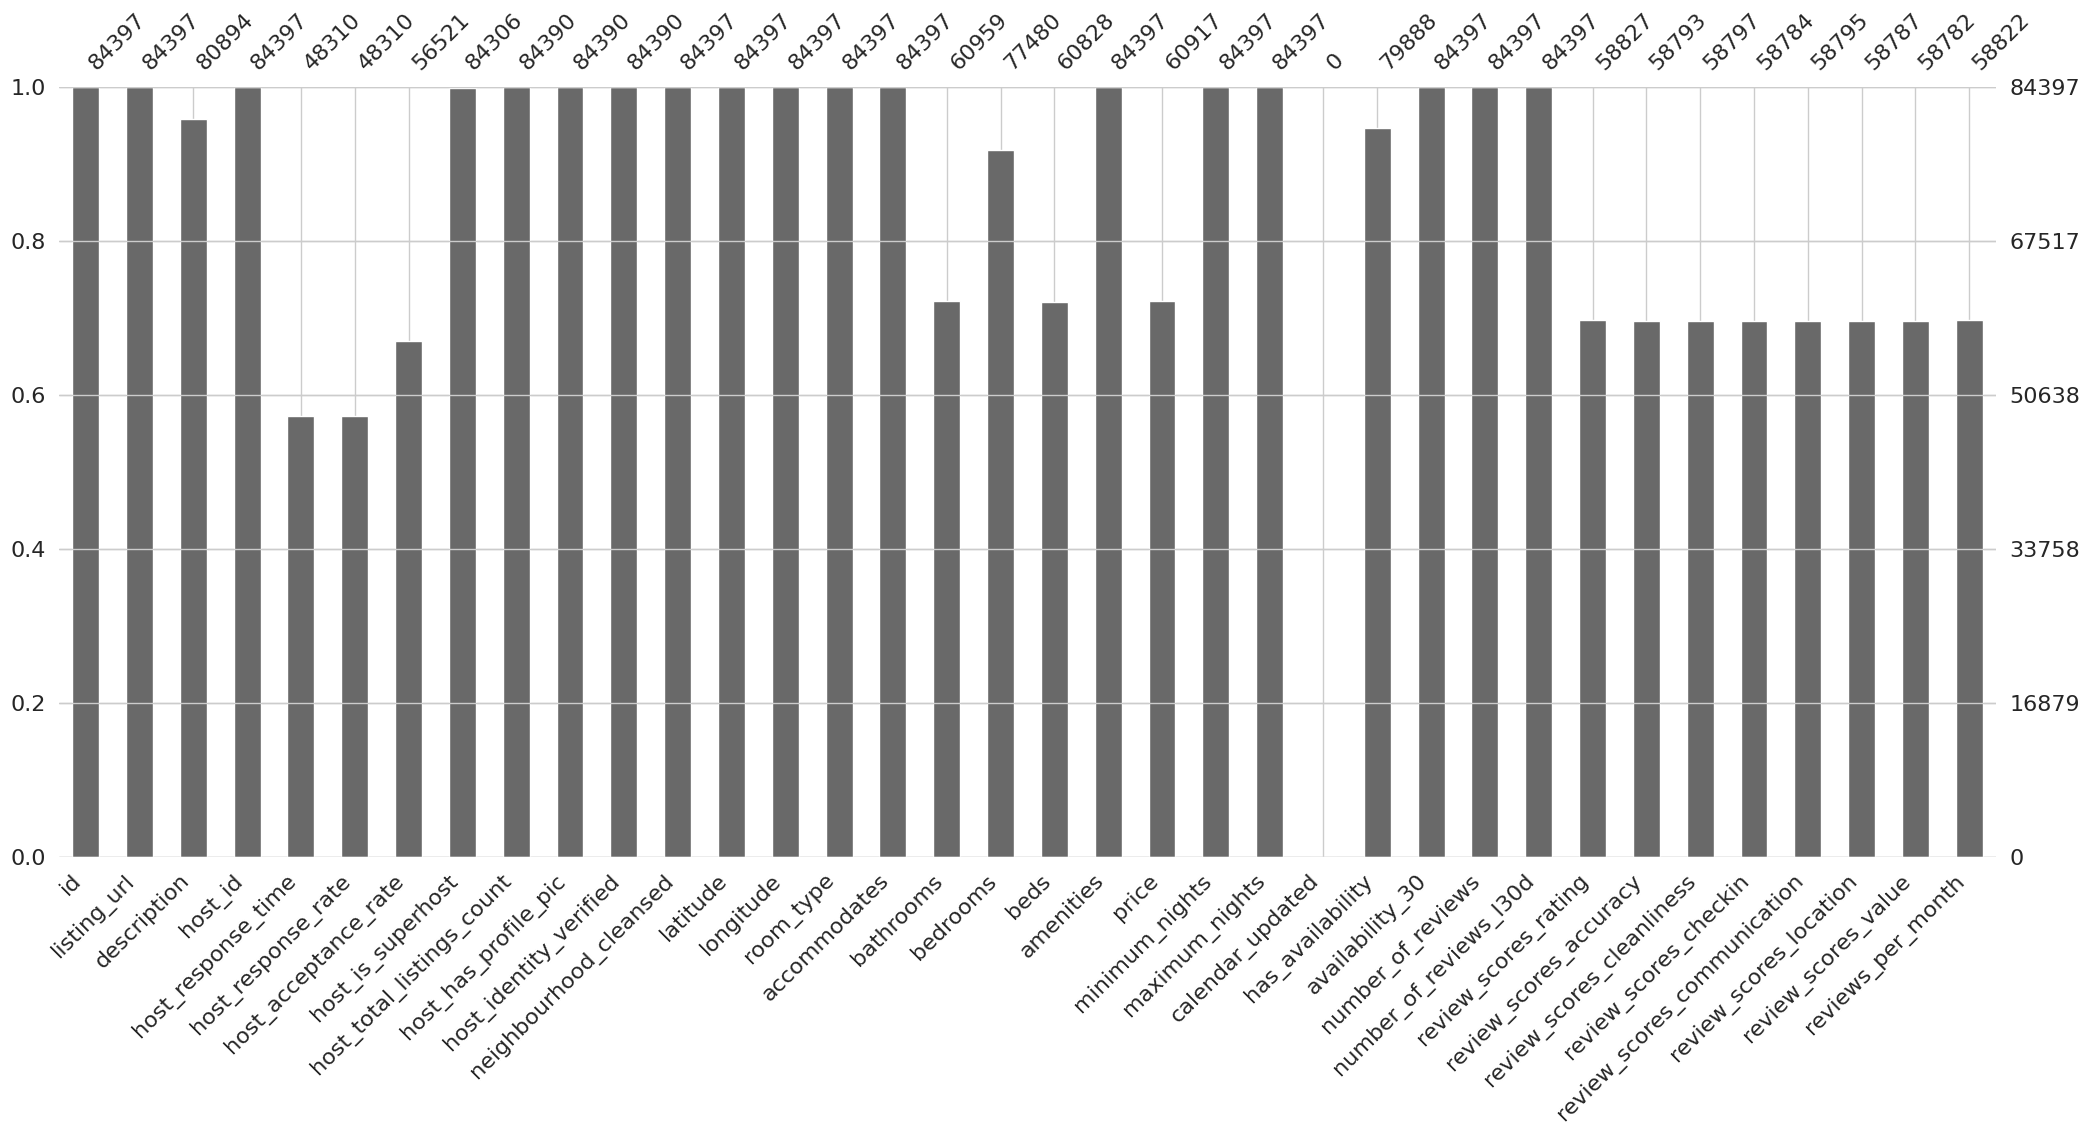

In [11]:
#결측치 시각화
msno.bar(bnb)

In [12]:
# 데이터 내용 간단히 점검
print("총 데이터 건수 : ", bnb.shape[0] * bnb.shape[1])
print("총 결측치 수 : {} = 전체 데이터의 {:.2f}%".format(bnb.isnull().sum().sum(), (bnb.isnull().sum().sum()) * 100 / (bnb.shape[0] * bnb.shape[1])))
print("호스트 ID: {}개, host_identity_verified {}".format(bnb['host_id'].nunique(), bnb["host_identity_verified"].nunique()))
#print("평균 Airbnb 풀옵션 금액 : {:.2f}$".format(bnb['price'].mean()))


총 데이터 건수 :  3038292
총 결측치 수 : 474764 = 전체 데이터의 15.63%
호스트 ID: 62689개, host_identity_verified 2


In [13]:
bnb.duplicated().sum()

0

In [15]:
pip install distplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distplot (from versions: none)
ERROR: No matching distribution found for distplot

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


ValueError: could not convert string to float: '$250.00'

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

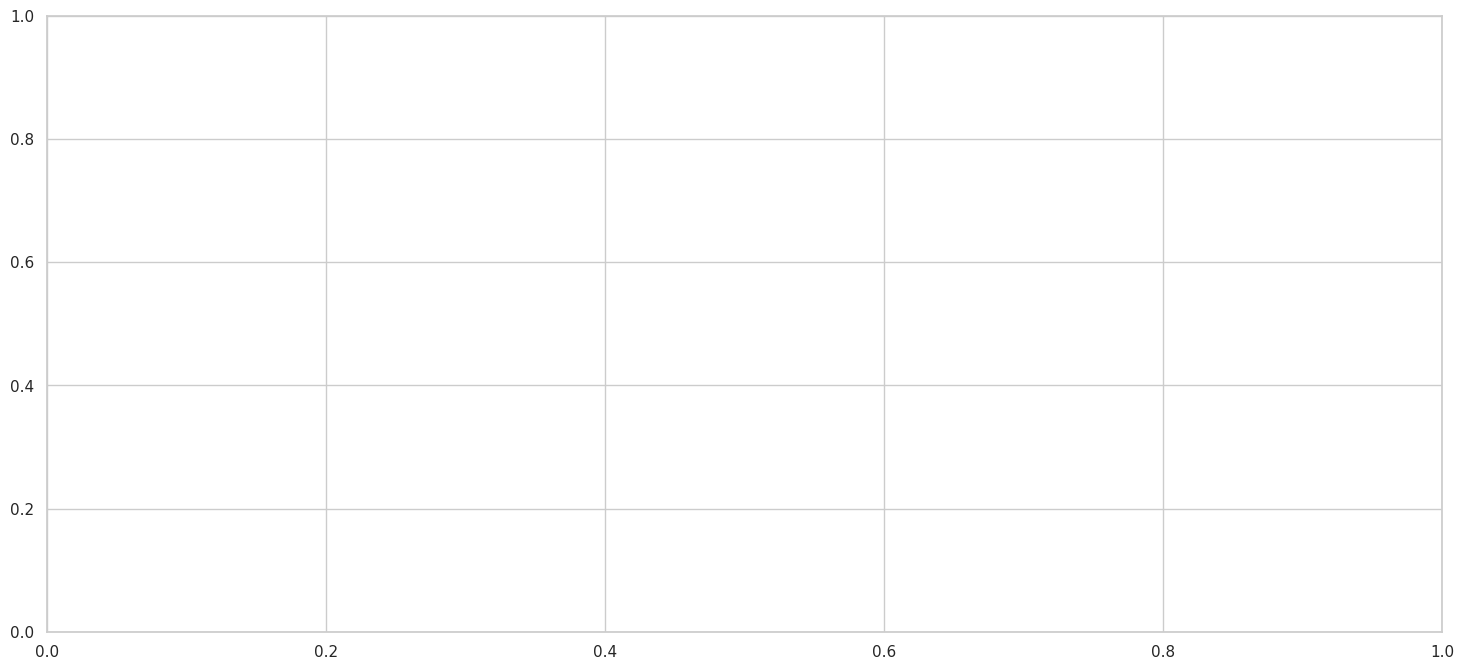

In [17]:
f, ax = plt.subplots(1, 1, figsize = (18,8))

sns.distplot(bnb["price"], hist = True, ax=ax)
ax.set_xlim(-500, 6000)
ax.set_title("price 컬럼분포", size = 20)

plt.show()

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

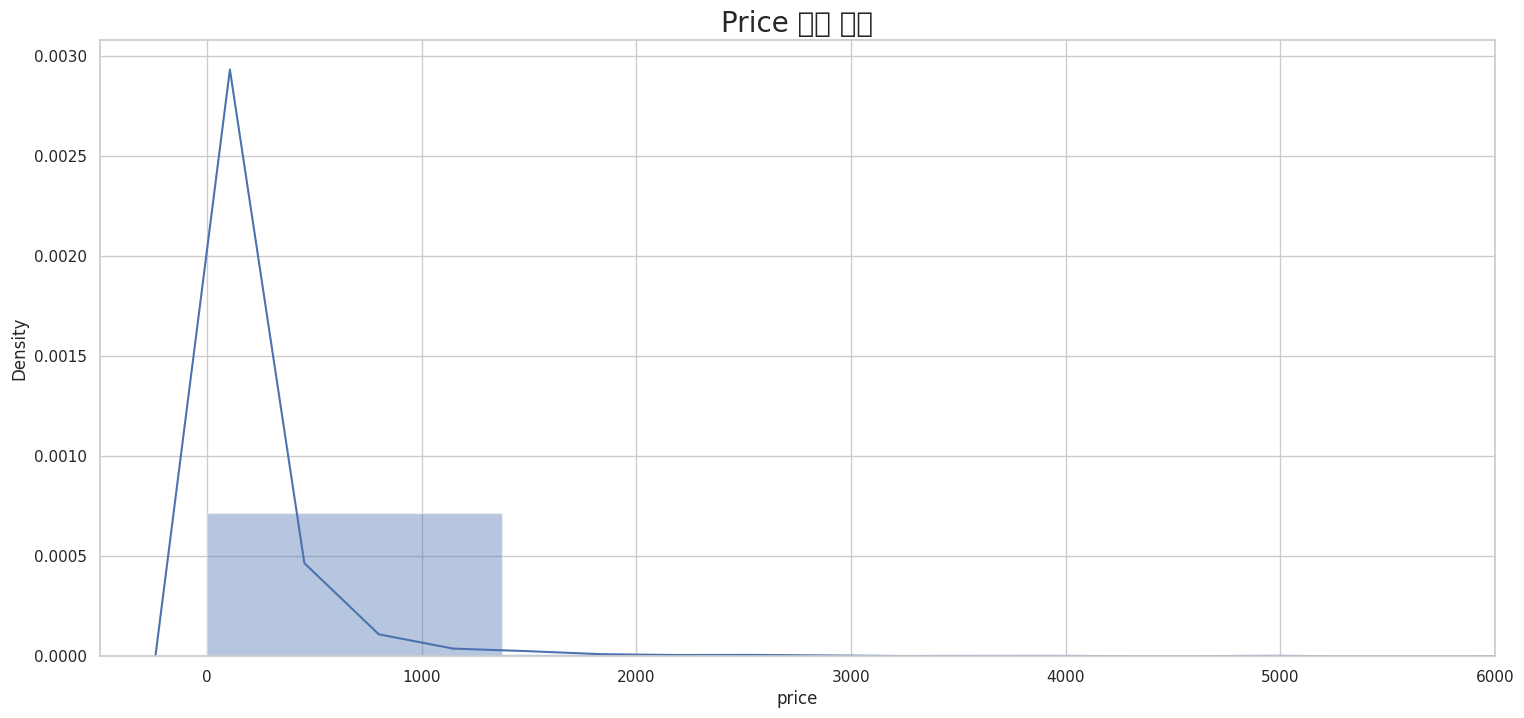

In [18]:
import pandas as pd

# $ 기호 제거 후 실수형으로 변환
bnb['price'] = bnb['price'].replace('[\$,]', '', regex=True).astype(float)

# 그래프 그리기
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.distplot(bnb['price'], hist=True, ax=ax)
ax.set_xlim(-500, 6000)
ax.set_title("Price 컬럼 분포", size=20)
plt.show()
